In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import pathlib

In [2]:
save_plots = True

In [3]:
## Create plots directory, if missing
plot_directory = (str(pathlib.Path.home())
                  + '/vertex-reconstruction-studies/'
                  + 'plots/'
                  + 'B_studies_on_parsed_logs/'
                  + 'oscillation_study/'
)
pathlib.Path(plot_directory).mkdir(parents=True, exist_ok=True)

In [4]:
io_folder = '/scratch/user/adegenna/top50_debug_only/'
input_file = io_folder + 'davinci_parsed_log_truthmatched.h5'

In [5]:
df_events = pd.read_hdf(input_file, key='LHCbMC_Lb')
df_events

,Lb_ENDVERTEX_X,Lb_ENDVERTEX_Y,Lb_ENDVERTEX_Z,L_ENDVERTEX_X,L_ENDVERTEX_Y,L_ENDVERTEX_Z,Jpsi_ENDVERTEX_X,Jpsi_ENDVERTEX_Y,Jpsi_ENDVERTEX_Z,L_PX,...,pim_posMomCovMatrix_3_5,pim_posMomCovMatrix_3_6,pim_posMomCovMatrix_4_4,pim_posMomCovMatrix_4_5,pim_posMomCovMatrix_4_6,pim_posMomCovMatrix_5_5,pim_posMomCovMatrix_5_6,pim_posMomCovMatrix_6_6,match_index,mismatch_perc
0,1.674753,0.053259,0.004623,461.983261,-78.247981,6504.222043,1.6747,0.0532,0.0037,4601.051416,...,3142.56,3145.09,17.4188,-213.8120,-214.0240,73162.60,73220.90,73279.20,0,0.000030
1,0.880395,-0.130333,15.654301,209.545799,199.243538,4381.083975,0.8804,-0.1302,15.6547,745.277623,...,9031.32,9376.81,43.3318,32.6465,34.2547,31859.40,33076.10,34339.40,1,0.000035
2,0.893069,-0.210212,27.346294,84.953310,-116.199707,5557.096303,0.8930,-0.2103,27.3459,627.274341,...,-28860.80,-28879.30,787.3740,-28372.3000,-28391.8000,1099220.00,1099920.00,1100620.00,4,0.000041
3,0.605380,-0.202738,22.149234,-187.066928,17.364279,3467.294482,0.6057,-0.2032,22.1485,-2559.069617,...,26939.30,26960.10,90.1864,5198.5100,5202.8900,669476.00,669988.00,670499.00,9,0.000034
4,0.636031,-0.090822,-65.799311,-207.686722,152.674077,7297.794399,0.6356,-0.0907,-65.7961,-1549.606044,...,-13094.40,-13105.40,201.6090,6041.5000,6048.1100,340592.00,340879.00,341166.00,11,0.000040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6496,0.893651,-0.241412,-8.355713,-125.966633,-256.004059,4922.386341,0.8932,-0.2407,-8.3660,-822.995268,...,-3460.50,-4057.95,26.0127,-318.8400,-374.3880,5589.84,6552.96,7682.67,50285,0.000036
6497,3.966071,-2.533509,19.089908,951.244904,-401.923404,4663.160501,3.9666,-2.5339,19.0920,6062.898847,...,11824.60,11897.10,1431.6900,-15274.0000,-15371.8000,168929.00,169961.00,171000.00,50292,0.000032
6498,0.421768,-0.947067,-73.637508,-192.066143,-297.004409,4468.714184,0.4218,-0.9471,-73.6377,-2005.253008,...,44215.30,44303.10,4699.9900,-79816.6000,-79987.3000,1418820.00,1421630.00,1424450.00,50321,0.000037
6499,0.950653,-0.221805,-6.273085,115.579259,44.852030,5494.442486,0.9512,-0.2219,-6.2745,1036.018343,...,8858.18,8880.50,16.3900,-294.3940,-295.1690,121761.00,122067.00,122373.00,50323,0.000034


# Oscillation of components during iterations
Commonly known as "oscillating vertex", except it's not *just* the vertex.

In [6]:
## Use 1,2,3 instead of 0,1,2. Trust me, it's easier.
def get_1d_comp(series, component):
    return series.map(lambda x: x[component-1])

def get_1d_coord(series, coordinate):  
    coord_to_comp = {'x': 1, 'y': 2, 'z': 3}
    return get_1d_comp(series, coord_to_comp[coordinate])

In [7]:
df_events['status']

0          Converged
1          Converged
2          Converged
3       NonConverged
4          Converged
            ...     
6496    NonConverged
6497    NonConverged
6498       Converged
6499    NonConverged
6500       Converged
Name: status, Length: 6311, dtype: object

In [8]:
def plot_event_vertex(evt_index: int):
    for component, coordinate in zip([0,1,2], ['x','y','z']):
        elements = [df_events[f'seed_vtx_{coordinate.upper()}'][evt_index]] + [el[component] for el in df_events['iter_currentVertices'][evt_index]]
        iteration = range(len(elements))

        plt.plot(iteration, elements, color='black')
        plt.xlabel('Iteration')
        plt.ylabel(f'${coordinate}_\mathrm{{vtx}}^\Lambda$ [mm]')
        plt.grid()
        if save_plots:
            plt.savefig(plot_directory + f"evt{str(evt_index)}_vertex_{coordinate}" + '.pdf', bbox_inches='tight')
        plt.show()

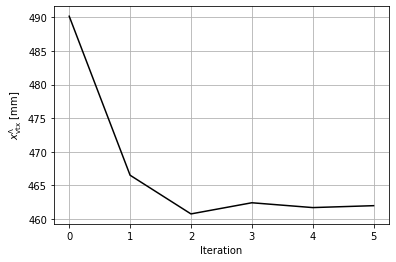

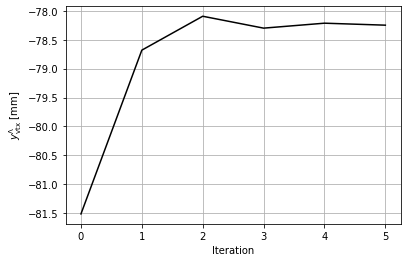

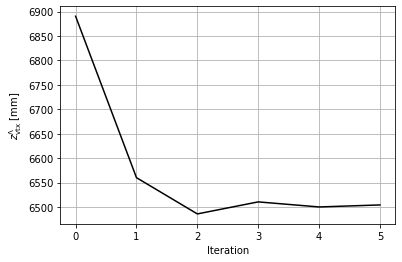

In [9]:
plot_event_vertex(evt_index=0)

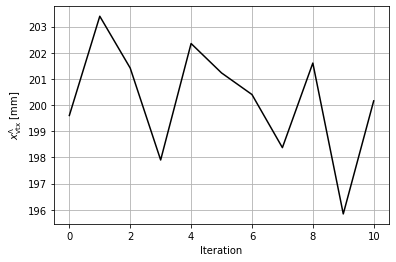

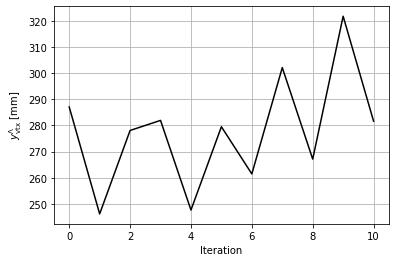

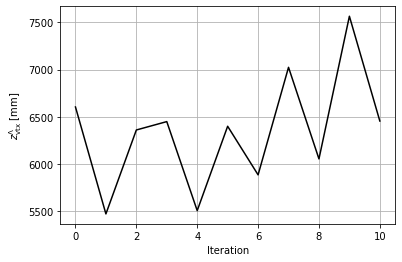

In [10]:
plot_event_vertex(evt_index=83)